# Naive Bayes

In [66]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# En este caso usamos un naive bayes que puede usar datos continuos aproximando una distribución gaussiana para cada variable, 
# pero en la documentación existen otros tipos de naive bayes

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

De forma esquemática Naive Bayes funciona de la siguiente forma:
1. Convertir el conjunto de datos en una tabla de frecuencias.
2. Crear una tabla de probabilidad calculando las correspondientes a que ocurran los diversos eventos.
3. La ecuación Naive Bayes se usa para calcular la probabilidad posterior de cada clase.
4. La clase con la probabilidad posterior más alta es el resultado de la predicción.

Se va a usar para esta práctica un dataset implícito en la librería de scikit-learn sobre una vinoteca

In [67]:
wine = datasets.load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [68]:
df.shape

(178, 14)

In [69]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Comprobamos el balance de la variable objetivo

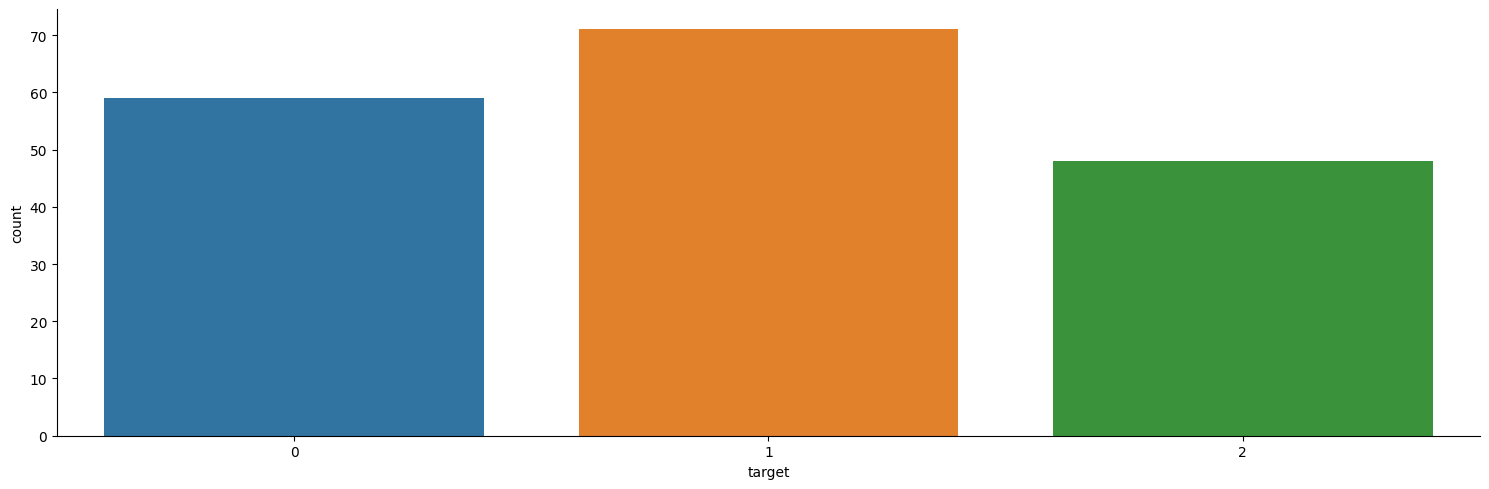

In [70]:
sb.factorplot('target', data=df, kind="count", aspect=3)
plt.show()

In [71]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [72]:
gnb = GaussianNB()

# entrenamos el modelo
gnb.fit(X_train, y_train)

# predecimos usando el modelo y los datos de test, para una validación honesta
y_pred = gnb.predict(X_test)

In [73]:
# comprobamos la métrica de exactitud
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



### Ejercicio

Aplica lo aprendido sobre Naive Bayes en el dataset de bank.csv. ¿Cómo de bien se ajusta el modelo?